In [2]:
# Read csv file into a pandas dataframe
data = pd.read_csv("ecomm_sales_data.csv")
data

,Product,Date,MRP,Discount,CLP,Platform,City,City Tier,Impressions,Clicks,Spend,Quantity Sold,Competitor,Competitor MRP,Competitor Discount,Competitor Price
0,Cream,4/1/2024,560,0.2,448.0,Myntra,Amritsar,Tier 3,3925,91,378,7,Competitor A,515,0.2,412.0
1,Cream,4/1/2024,560,0.2,448.0,Myntra,Bangalore,Tier 1,3348,66,167,3,Competitor A,515,0.2,412.0
2,Cream,4/1/2024,560,0.2,448.0,Flipkart,Varanasi,Tier 3,6124,169,1843,7,Competitor A,515,0.2,412.0
3,Cream,4/1/2024,560,0.2,448.0,Myntra,Kolkata,Tier 1,6885,124,475,7,Competitor A,515,0.2,412.0
4,Cream,4/1/2024,560,0.2,448.0,Nykaa,Amritsar,Tier 3,7396,84,497,3,Competitor A,515,0.2,412.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19975,SkinCare,9/27/2024,499,0.0,499.0,Flipkart,Jodhpur,Tier 3,2421,93,384,5,Competitor E,400,0.0,400.0
19976,SkinCare,9/27/2024,499,0.0,499.0,Purplle,Jamshedpur,Tier 3,721,14,324,1,Competitor E,400,0.0,400.0
19977,SkinCare,9/27/2024,499,0.0,499.0,Myntra,Faridabad,Tier 2,4509,287,752,24,Competitor E,400,0.0,400.0
19978,SkinCare,9/27/2024,499,0.0,499.0,Flipkart,Bangalore,Tier 1,12663,619,3130,35,Competitor E,400,0.0,400.0


In [3]:
# descriptive analysis
data.describe()

,MRP,Discount,CLP,Impressions,Clicks,Spend,Quantity Sold,Competitor MRP,Competitor Discount,Competitor Price
count,19980.000000,19980.000000,19980.000000,19980.000000,19980.000000,19980.000000,19980.000000,19980.000000,19980.000000,19980.000000
mean,634.942342,0.148198,541.451582,5657.151151,252.748298,1255.503303,20.037337,524.158859,0.100786,471.476436
std,297.209526,0.098100,262.879473,3610.895641,211.180071,1086.169637,21.216629,167.330999,0.069582,155.898538
min,300.000000,0.000000,210.000000,70.000000,1.000000,1.000000,1.000000,350.000000,0.000000,280.000000
25%,499.000000,0.050000,349.300000,2667.000000,90.000000,369.000000,5.000000,400.000000,0.050000,340.000000
50%,560.000000,0.150000,476.000000,5265.000000,194.000000,948.000000,13.000000,515.000000,0.100000,437.750000
75%,649.000000,0.250000,616.550000,8175.250000,362.000000,1888.250000,27.000000,539.000000,0.150000,539.000000
max,1149.000000,0.300000,1149.000000,15000.000000,1185.000000,5212.000000,194.000000,810.000000,0.200000,810.000000


In [4]:
data.shape

(19980, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19980 entries, 0 to 19979
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product              19980 non-null  object 
 1   Date                 19980 non-null  object 
 2   MRP                  19980 non-null  int64  
 3   Discount             19980 non-null  float64
 4   CLP                  19980 non-null  float64
 5   Platform             19980 non-null  object 
 6   City                 19980 non-null  object 
 7   City Tier            19980 non-null  object 
 8   Impressions          19980 non-null  int64  
 9   Clicks               19980 non-null  int64  
 10  Spend                19980 non-null  int64  
 11  Quantity Sold        19980 non-null  int64  
 12  Competitor           19980 non-null  object 
 13  Competitor MRP       19980 non-null  int64  
 14  Competitor Discount  19980 non-null  float64
 15  Competitor Price     19980 non-null 

In [6]:
data.drop_duplicates(inplace = True)

In [7]:
data.shape

(19980, 16)

In [8]:
data.skew(numeric_only = True)

MRP                    0.795798
Discount               0.018169
CLP                    0.877454
Impressions            0.458649
Clicks                 1.210753
Spend                  1.025348
Quantity Sold          2.114724
Competitor MRP         0.763241
Competitor Discount    0.014183
Competitor Price       0.815110
dtype: float64

In [9]:
def extreme_outliers(df,column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    up = q3 + 3*iqr
    lb = q1 - 3*iqr
    ext_outliers = df[(df[column]>up) | (df[column]<lb)]
    return ext_outliers

In [10]:
selected_columns = data.select_dtypes(include = ["number"])
for col in selected_columns:
    ext_out = extreme_outliers(data,col)
    if len(ext_out)>0:
        print("Extreme outliers found in",col,"and the count is",len(ext_out))
        data[col] = mstats.winsorize(data[col], limits=[0.05, 0.05])  #capping the 5th and 95th percentile values
    else:
        print("No extreme outlier found in", col)

Extreme outliers found in MRP and the count is 4406
No extreme outlier found in Discount
No extreme outlier found in CLP
No extreme outlier found in Impressions
Extreme outliers found in Clicks and the count is 1
No extreme outlier found in Spend
Extreme outliers found in Quantity Sold and the count is 260
No extreme outlier found in Competitor MRP
No extreme outlier found in Competitor Discount
No extreme outlier found in Competitor Price


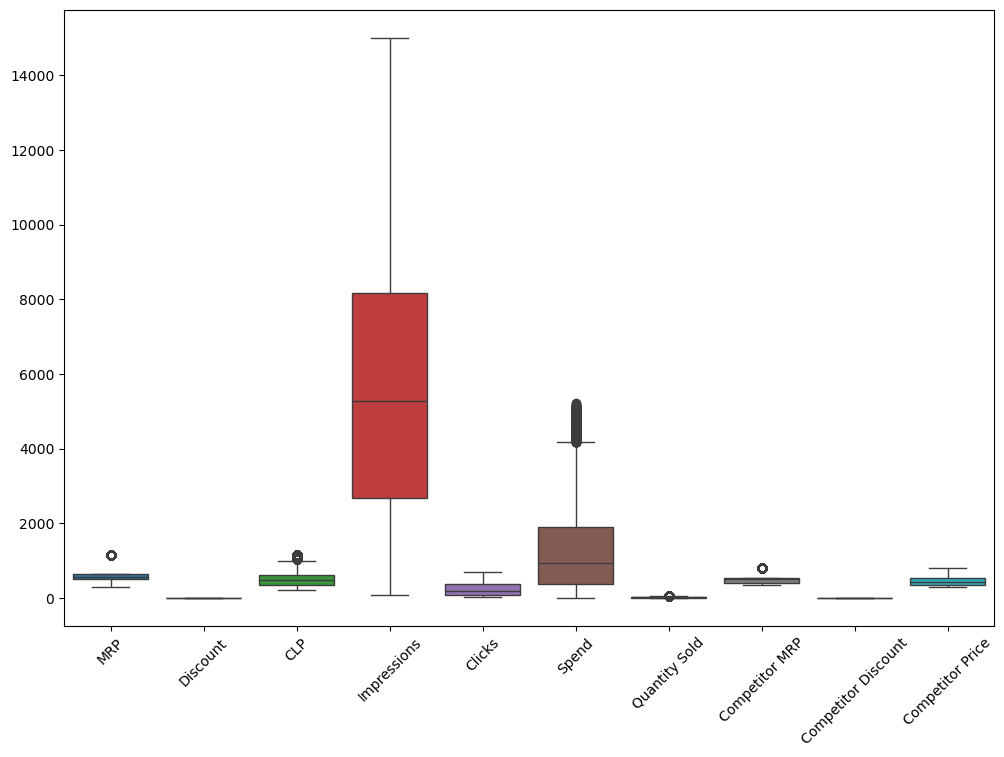

In [11]:
plt.figure(figsize=(12, 8))
plt.xticks(rotation=45)
sns.boxplot(data = data)
plt.show()

In [12]:
#checking for any missing values
data.isnull().sum()

Product                0
Date                   0
MRP                    0
Discount               0
CLP                    0
Platform               0
City                   0
City Tier              0
Impressions            0
Clicks                 0
Spend                  0
Quantity Sold          0
Competitor             0
Competitor MRP         0
Competitor Discount    0
Competitor Price       0
dtype: int64

In [13]:
#measuring skewness
data.skew(numeric_only = True)

MRP                    0.795798
Discount               0.018169
CLP                    0.877454
Impressions            0.458649
Clicks                 0.845257
Spend                  1.025348
Quantity Sold          1.155058
Competitor MRP         0.763241
Competitor Discount    0.014183
Competitor Price       0.815110
dtype: float64

In [14]:
data["Date"] = pd.to_datetime(data["Date"])
data['Month_Name'] = data['Date'].dt.month_name()

In [15]:
data.head()

,Product,Date,MRP,Discount,CLP,Platform,City,City Tier,Impressions,Clicks,Spend,Quantity Sold,Competitor,Competitor MRP,Competitor Discount,Competitor Price,Month_Name
0,Cream,2024-04-01,560,0.2,448.0,Myntra,Amritsar,Tier 3,3925,91,378,7,Competitor A,515,0.2,412.0,April
1,Cream,2024-04-01,560,0.2,448.0,Myntra,Bangalore,Tier 1,3348,66,167,3,Competitor A,515,0.2,412.0,April
2,Cream,2024-04-01,560,0.2,448.0,Flipkart,Varanasi,Tier 3,6124,169,1843,7,Competitor A,515,0.2,412.0,April
3,Cream,2024-04-01,560,0.2,448.0,Myntra,Kolkata,Tier 1,6885,124,475,7,Competitor A,515,0.2,412.0,April
4,Cream,2024-04-01,560,0.2,448.0,Nykaa,Amritsar,Tier 3,7396,84,497,3,Competitor A,515,0.2,412.0,April


In [16]:
data.drop(columns = "Date", inplace = True)


Univariate Analysis of Numerical Variables:


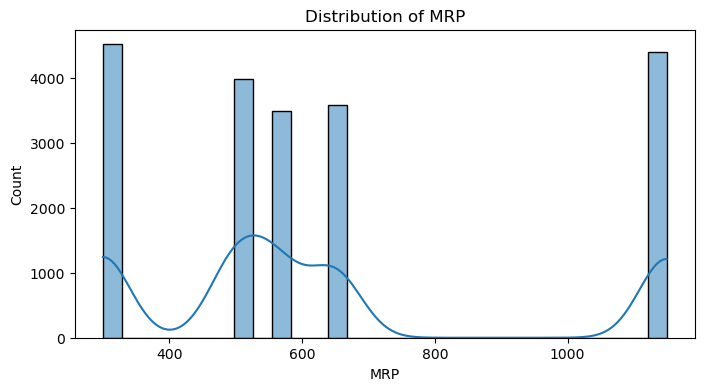

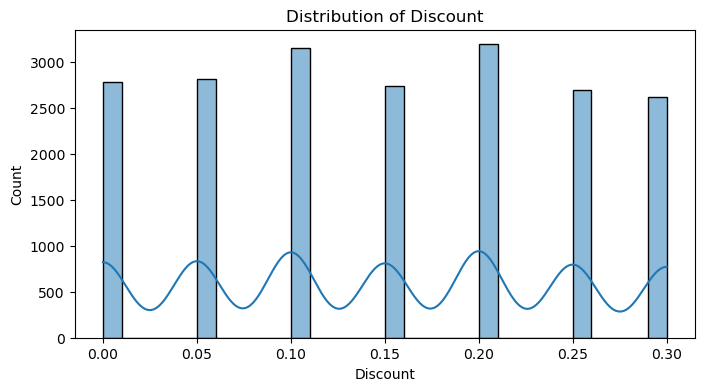

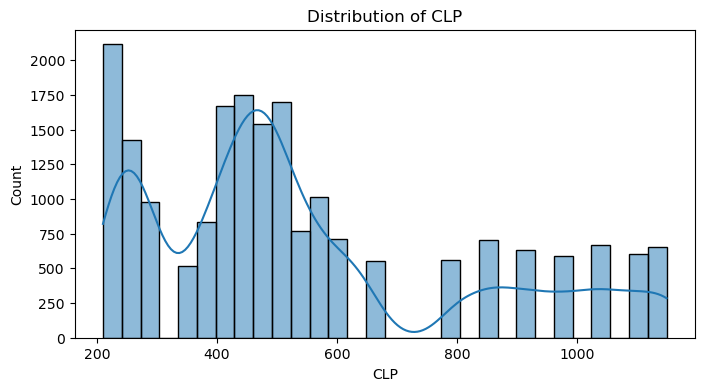

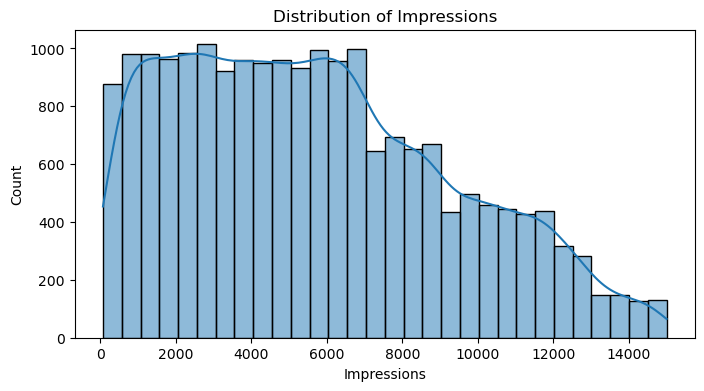

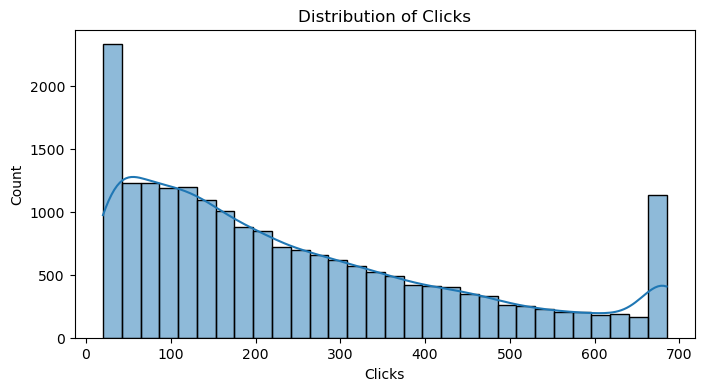

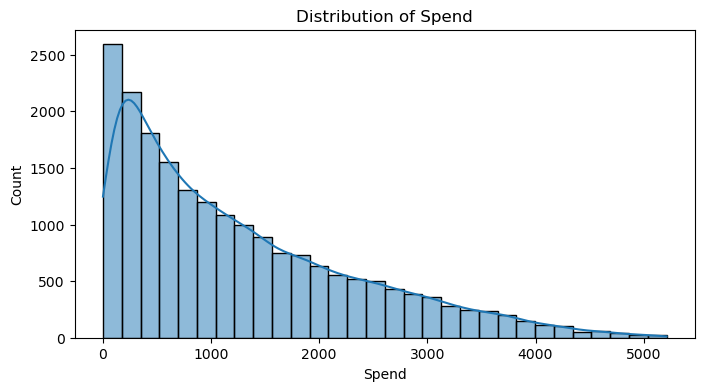

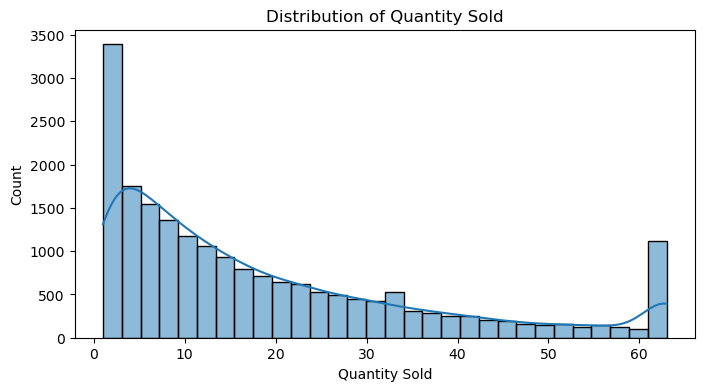

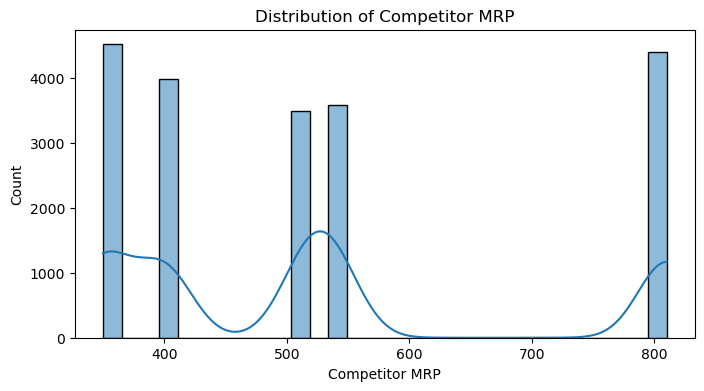

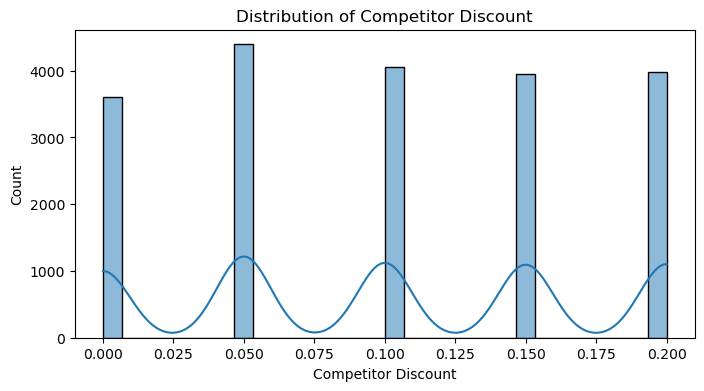

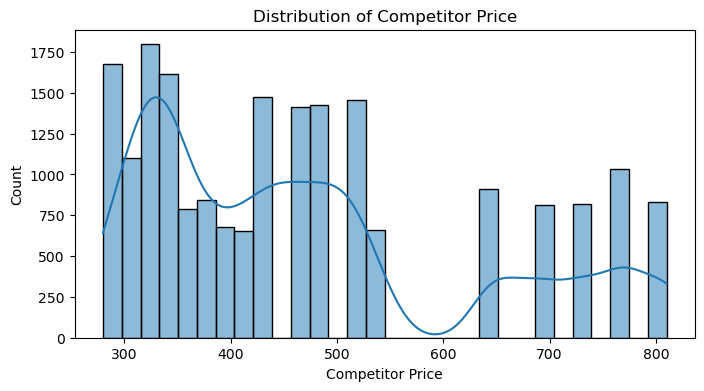

In [17]:
# Visualizing numerical features
num_cols = data.select_dtypes(include = ["number"])
print("\nUnivariate Analysis of Numerical Variables:")
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

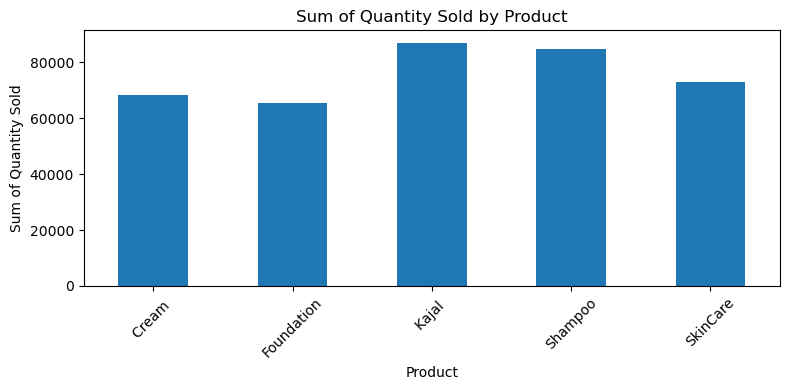

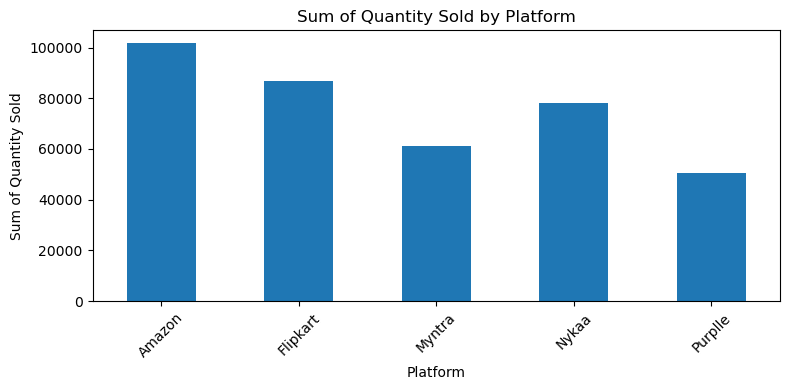

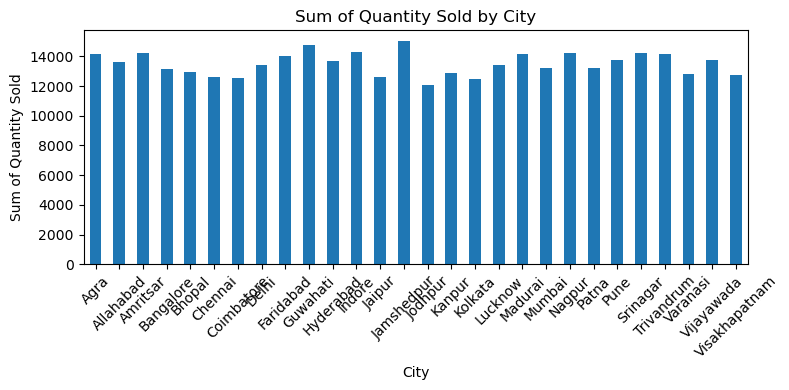

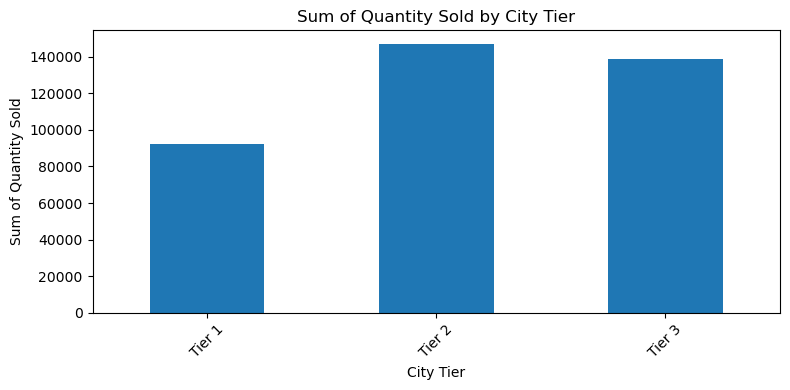

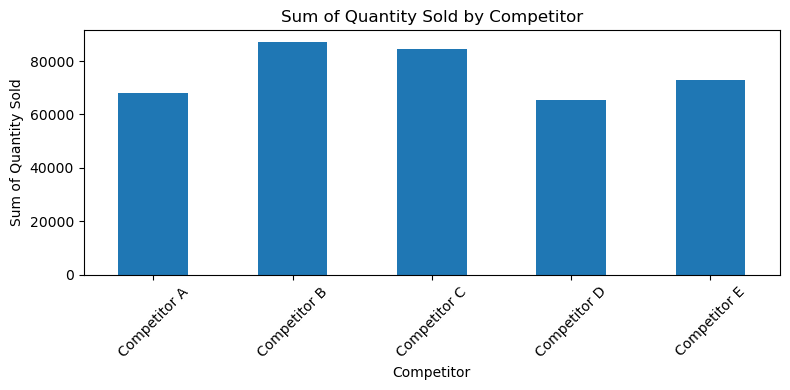

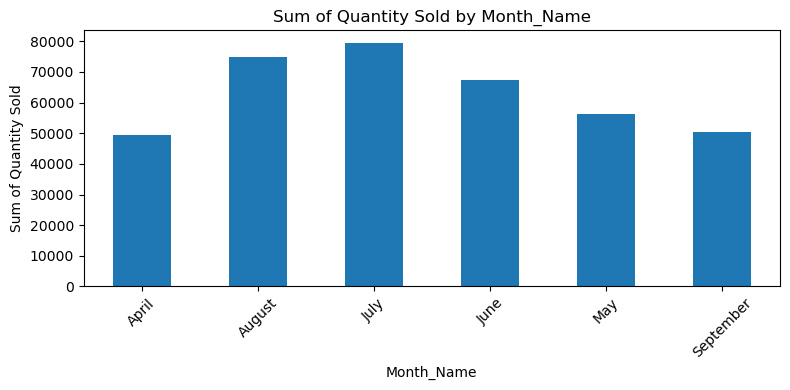

In [18]:
# Visualizing categorical features w.r.t Quantity sold
cat_vars = data.select_dtypes(include=['object','category']).columns
for cat_var in cat_vars:
    plt.figure(figsize=(8,4))  
    data.groupby(cat_var)['Quantity Sold'].sum().plot(kind='bar')  
    plt.title(f'Sum of Quantity Sold by {cat_var}') 
    plt.xlabel(cat_var)  
    plt.ylabel('Sum of Quantity Sold')  
    plt.xticks(rotation=45)  
    plt.tight_layout()
    plt.show()

In [19]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data["Product"] = label.fit_transform(data["Product"])
data["Platform"] = label.fit_transform(data["Platform"])
data["Competitor"] = label.fit_transform(data["Competitor"])
data["Month_Name"] = label.fit_transform(data["Month_Name"])

In [20]:
data.head()

,Product,MRP,Discount,CLP,Platform,City,City Tier,Impressions,Clicks,Spend,Quantity Sold,Competitor,Competitor MRP,Competitor Discount,Competitor Price,Month_Name
0,0,560,0.2,448.0,2,Amritsar,Tier 3,3925,91,378,7,0,515,0.2,412.0,0
1,0,560,0.2,448.0,2,Bangalore,Tier 1,3348,66,167,3,0,515,0.2,412.0,0
2,0,560,0.2,448.0,1,Varanasi,Tier 3,6124,169,1843,7,0,515,0.2,412.0,0
3,0,560,0.2,448.0,2,Kolkata,Tier 1,6885,124,475,7,0,515,0.2,412.0,0
4,0,560,0.2,448.0,3,Amritsar,Tier 3,7396,84,497,3,0,515,0.2,412.0,0


In [21]:
data = pd.get_dummies(data, columns = ["City Tier"], drop_first = True, dtype = 'int')
data.head()

,Product,MRP,Discount,CLP,Platform,City,Impressions,Clicks,Spend,Quantity Sold,Competitor,Competitor MRP,Competitor Discount,Competitor Price,Month_Name,City Tier_Tier 2,City Tier_Tier 3
0,0,560,0.2,448.0,2,Amritsar,3925,91,378,7,0,515,0.2,412.0,0,0,1
1,0,560,0.2,448.0,2,Bangalore,3348,66,167,3,0,515,0.2,412.0,0,0,0
2,0,560,0.2,448.0,1,Varanasi,6124,169,1843,7,0,515,0.2,412.0,0,0,1
3,0,560,0.2,448.0,2,Kolkata,6885,124,475,7,0,515,0.2,412.0,0,0,0
4,0,560,0.2,448.0,3,Amritsar,7396,84,497,3,0,515,0.2,412.0,0,0,1


In [22]:
data["Net_Profit"] = data["CLP"] - data["Spend"]
data.head()

,Product,MRP,Discount,CLP,Platform,City,Impressions,Clicks,Spend,Quantity Sold,Competitor,Competitor MRP,Competitor Discount,Competitor Price,Month_Name,City Tier_Tier 2,City Tier_Tier 3,Net_Profit
0,0,560,0.2,448.0,2,Amritsar,3925,91,378,7,0,515,0.2,412.0,0,0,1,70.0
1,0,560,0.2,448.0,2,Bangalore,3348,66,167,3,0,515,0.2,412.0,0,0,0,281.0
2,0,560,0.2,448.0,1,Varanasi,6124,169,1843,7,0,515,0.2,412.0,0,0,1,-1395.0
3,0,560,0.2,448.0,2,Kolkata,6885,124,475,7,0,515,0.2,412.0,0,0,0,-27.0
4,0,560,0.2,448.0,3,Amritsar,7396,84,497,3,0,515,0.2,412.0,0,0,1,-49.0


In [41]:
data["Log_Quantity_sold"] = np.log1p(data["Quantity Sold"])

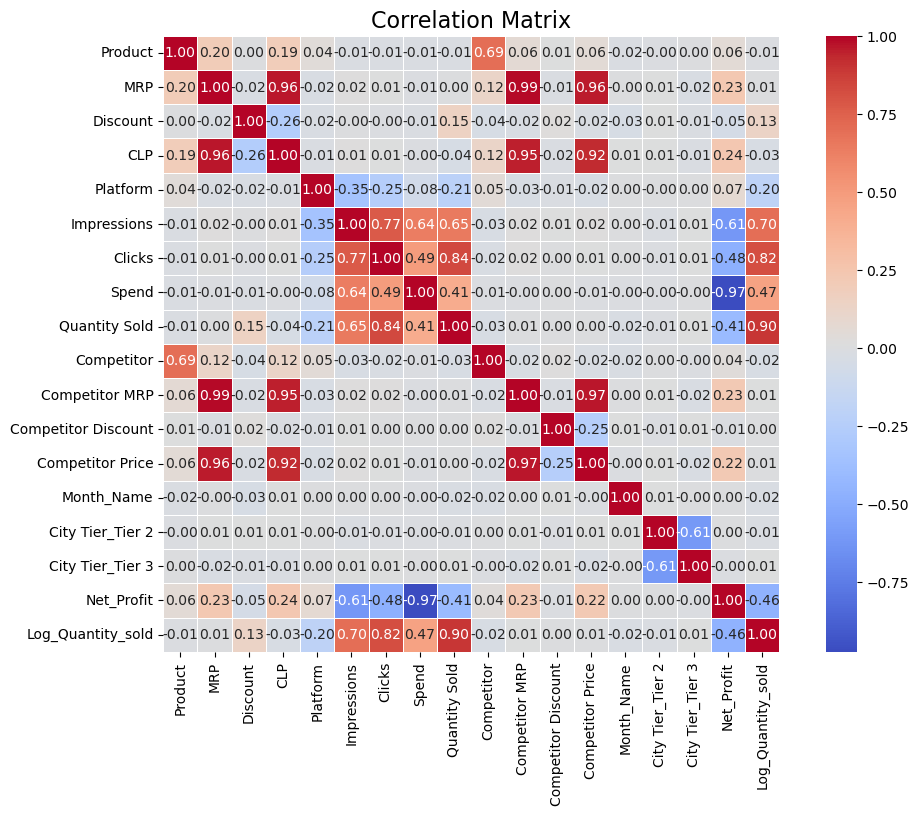

In [42]:
# correlation matrix
corr_matrix = data.select_dtypes(include = "number").corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5, cbar=True)           
plt.title("Correlation Matrix", fontsize=16)
plt.show()

<Figure size 1000x800 with 0 Axes>

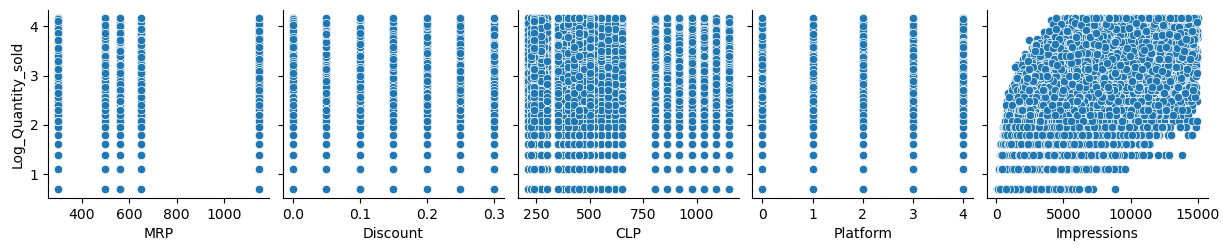

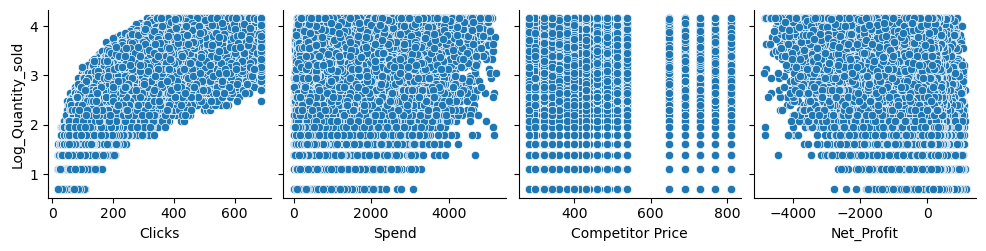

In [43]:
plt.figure(figsize = (10,8))
sns.pairplot(data, x_vars = ["MRP",	"Discount",	"CLP", "Platform", "Impressions"], y_vars = "Log_Quantity_sold")
sns.pairplot(data, x_vars = ["Clicks", "Spend", "Competitor Price", "Net_Profit"], y_vars = "Log_Quantity_sold")
plt.show()

In [44]:
X = data[["MRP", "Discount", "CLP", "Platform", "Impressions", "Clicks", "Spend", "Competitor Price", "Net_Profit"]]
y = data["Log_Quantity_sold"]

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
for col in X.columns:
    if col == "Platform":
        continue
    X[col] = sc.fit_transform(X[[col]])

In [46]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
#function to display name, r-square, rmse and mae for the model
def met(name,key,arg):
    print('Name of the model: ',name)
    print('R-square of the model:',r2_score(key,arg))
    print('RMSE of the model:',np.sqrt(mean_squared_error(key,arg)))
    print('MAE of the model:',mean_absolute_error(key,arg))

In [48]:
# LinearRegression
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [49]:
#Predict Quantity sold based on input variables
y_pred_lr = regr.predict(x_test)
met('Linear Regression Model and result for train',y_test, y_pred_lr)

Name of the model:  Linear Regression Model and result for train
R-square of the model: 0.7078221115363936
RMSE of the model: 0.5377966714963948
MAE of the model: 0.44740739527592277


In [50]:
residuals = y_test - y_pred_lr
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -0.006633397193949926


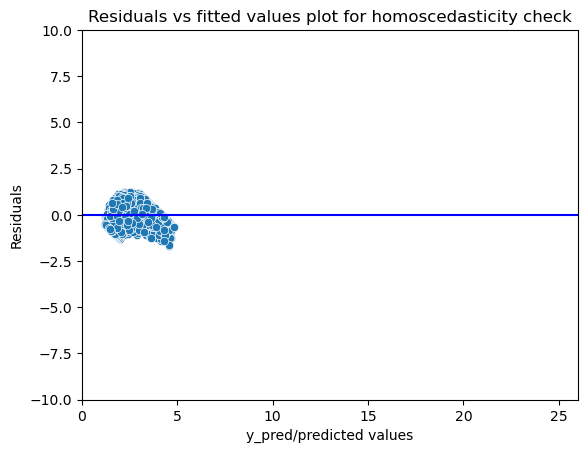

In [51]:
p = sns.scatterplot(x=y_pred_lr,y=residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot(x=[0,26],y=[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

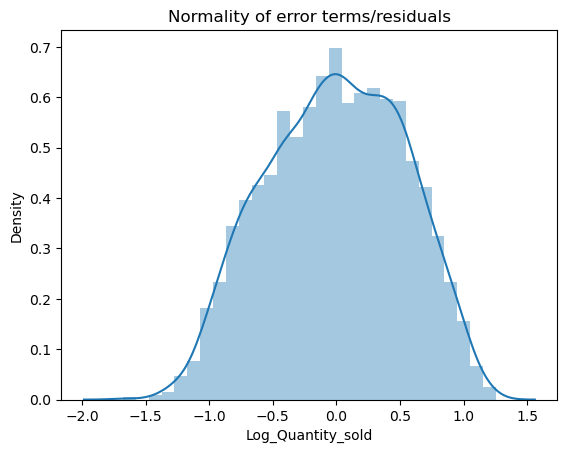

In [52]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

In [53]:
# OLS Regression for more detailed statistics
X_train_const = sm.add_constant(x_train)
ols_model = sm.OLS(y_train, X_train_const).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:      Log_Quantity_sold   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     4738.
Date:                Mon, 06 Jan 2025   Prob (F-statistic):               0.00
Time:                        02:34:24   Log-Likelihood:                -12912.
No. Observations:               15984   AIC:                         2.584e+04
Df Residuals:                   15975   BIC:                         2.591e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.5057      0.008  

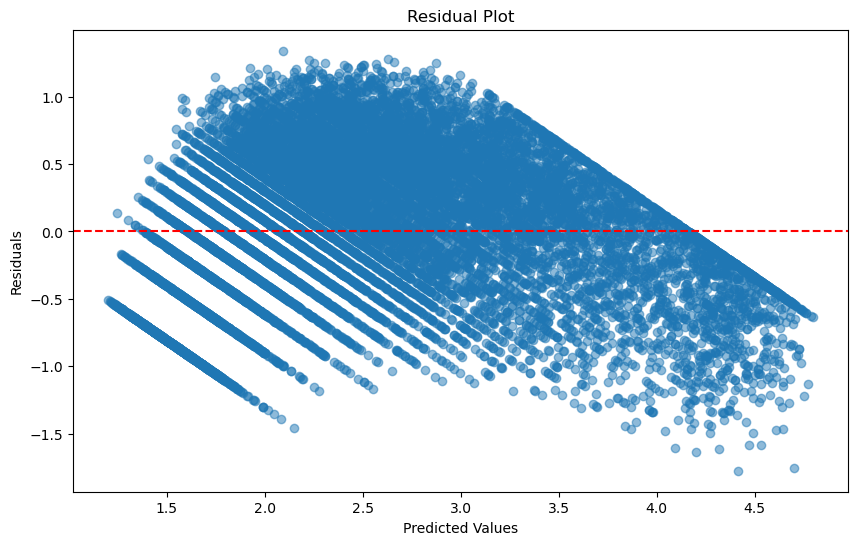

In [54]:
# Get the predictions and residuals
predictions = ols_model.predict(X_train_const)
residuals = y_train - predictions
    
 # Create the residual plot
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')  # Line at y=0 for reference
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

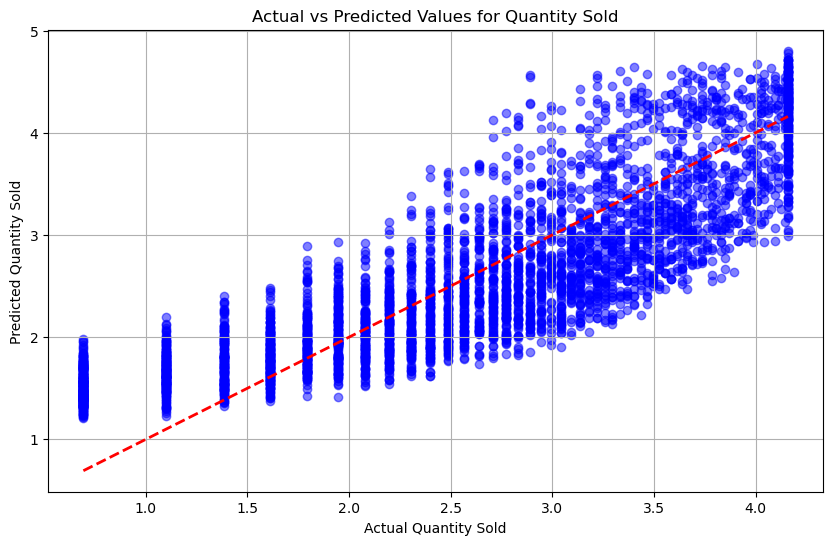

In [55]:
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # 45-degree line for reference
plt.xlabel('Actual Quantity Sold')
plt.ylabel('Predicted Quantity Sold')
plt.title('Actual vs Predicted Values for Quantity Sold')
plt.grid(True)
plt.show()

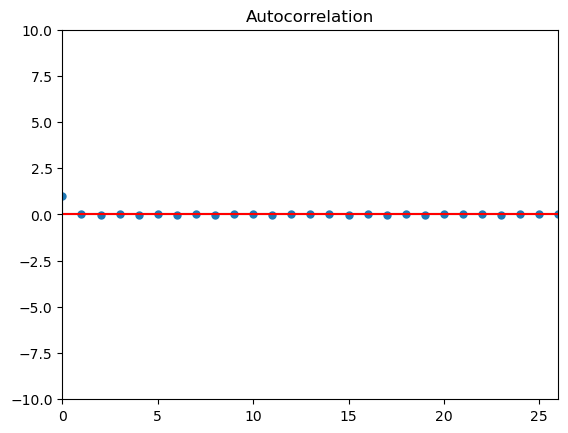

In [56]:
# autocorrelation
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.ylim(-10,10)
plt.xlim(0,26)
sns.lineplot(x=[0,26],y=[0,0],color='red')
plt.show()

In [57]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [58]:
y_pred_rf = rf.predict(x_test)
met('RandomForestRegressor model and result for test', y_test, y_pred_rf)

Name of the model:  RandomForestRegressor model and result for test
R-square of the model: 0.8075516599380583
RMSE of the model: 0.4364671086517573
MAE of the model: 0.35214675643793064
